In [2]:
import numpy as np
from matplotlib import pyplot as plt 
import math

### Problem Statement

s = sprinkler is on<br>
w = grass is wet<br>
r = rain<br>

p(r|s,w) = probability that it rained given sprinkler was on and grass is wet<br>
GOAL: estimate p(r|s,w) using sampling methods

### Part a

In [21]:
def approx_with_rejection(data, N):
    # -1 = rejected sample
    # 1 = accepted sample with R=T
    # 2 = accepted sample with R=F
    y = np.empty(N)
    lower = np.empty(N)
    upper = np.empty(N)
    
    num_rain = 0
    num_accepted = 0
    for i in range(1,N):
        if data[i] == 1:
            num_rain += 1
            num_accepted += 1
        elif data[i] == 2:
            num_accepted += 1
        y[i] = num_rain / num_accepted
        
        n = i+1
        epsilon = math.sqrt(math.log(40)/(2*n))
        lower[i] = y[i] - epsilon
        upper[i] = y[i] + epsilon
    return y, lower, upper, num_accepted

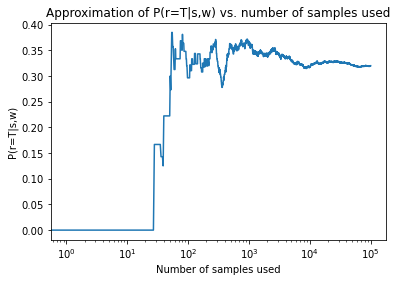

Approx. of P(r=T|s,w) w/ 100000 samples: 0.3198136868505912


In [22]:
N=100000
rs_1 = np.genfromtxt('rs_1.csv', delimiter=',')
x = np.arange(N)
y, _, _, num_accepted = approx_with_rejection(rs_1, N=N, epsilon=0)

plt.title("Approximation of P(r=T|s,w) vs. number of samples used") 
plt.xlabel("Number of samples used") 
plt.ylabel("P(r=T|s,w)") 
plt.plot(x,y)
plt.xscale('log')
plt.show()

print("Approx. of P(r=T|s,w) w/ 100000 samples: {}".format(y[99999]))

### Part b

In [23]:
epsilon = math.sqrt(math.log(40)/(2*num_accepted))
print("Accepted samples at N=100000: {}".format(num_accepted))
print("epsilon for n={}: {}".format(num_accepted,epsilon))

Accepted samples at N=100000: 27910
epsilon for n=27910: 0.008129284366775905


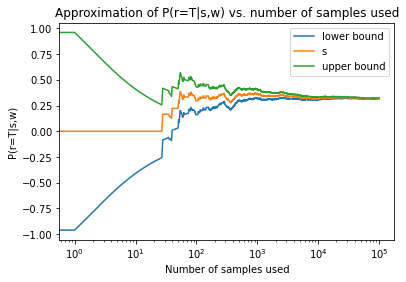

Approx. of P(r=T|s,w) w/ 100000 samples: 0.3198136868505912


In [25]:
y, lower, upper, _= approx_with_rejection(rs_1, N)

plt.title("Approximation of P(r=T|s,w) vs. number of samples used") 
plt.xlabel("Number of samples used") 
plt.ylabel("P(r=T|s,w)") 
plt.plot(x, lower, label="lower bound")
plt.plot(x, y, label="s")
plt.plot(x, upper, label="upper bound")
plt.xscale('log')
plt.legend()
plt.show()

print("Approx. of P(r=T|s,w) w/ 100000 samples: {}".format(y[99999]))

### Part c

In [31]:
def approx_with_likelihood(data, N):
    # 1 = accepted sample with R=T
    # 2 = accepted sample with R=F
    y = np.empty(N)

    curr_weight = 0
    total_weight = 0
    for i in range(N):
        if data[i][0] == 1:
            curr_weight += data[i][1]
            total_weight += data[i][1]
        elif data[i][0] == 2:
            total_weight += data[i][1]
        y[i] = curr_weight / total_weight
    return y

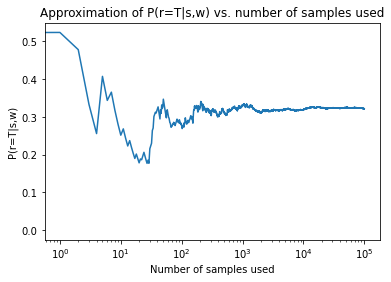

Approx. of P(r=T|s,w) w/ 100000 samples: 0.3217877911585514


In [36]:
N=100000
lw_1 = np.genfromtxt('lw_1.csv', delimiter=',')
x = np.arange(N)
y = approx_with_likelihood(lw_1, N=N)

plt.title("Approximation of P(r=T|s,w) vs. number of samples used") 
plt.xlabel("Number of samples used") 
plt.ylabel("P(r=T|s,w)") 
plt.semilogx(x,y)
plt.show()

print("Approx. of P(r=T|s,w) w/ 100000 samples: {}".format(y[99999]))